# Exploring the Memegenerator Metadata

This notebook demonstrates some of the basic things that can be done with the set of data from memegenerator. 
[Meme Generator](https://memegenerator.net/) is a site that has been archived by the Library of Congress in its Web Cultures archive. The data explored here is available from the LC Labs experiments page located here: https://labs.loc.gov/experiments/webarchive-datasets/. 

This notebook has a few sections:

1. Initial exploration & verification of the data set
2. Count and display information about the memes represented in the data set 
3. Count & visualize the types of memes in the data set 
4. Count the words in the memes 
5. Calculate the average number of words in each meme
6. Retrieve and display a specific meme 

## 1. Initial exploration & verification of the data set

This examples assumes that you have downloaded the csv file and saved it in the same folder as this notebook. 
The file is available from [this page](https://labs.loc.gov/experiments/webarchive-datasets/). To find the csv, click "Meme Generator Data Set Download External," unzip the file, and move the unzipped files into the same folder as this notebook. The blocks of code below demonstrate a few basic steps that allow you to open up the csv file and count the rows.

First, let's open up the csv and take a closer look at it. Before we open the file, we will need to import a few basic modules. We will use the csv module to work with the downloaded data set, the string module provides a few useful string manipulation tools, and pandas supports visualizing the information.   

In [1]:
import string
import csv
import pandas as pd

If we open the csv file using python's csv module, we can read the data into a dictionary, then isolate individual elements according to the associated column heading. Let's find out what the column names are: 

In [2]:
## use the contextual with open() method to open the file and read it
## note that the file is a 'utf-16' encoding
## to reuse this example you may need to change the filepath
with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata)
    print('Output fieldnames:',reader.fieldnames)
    for heading in reader.fieldnames:
        print('Headers output:',heading)

Output fieldnames: ['Meme ID\tArchived URL\tBase Meme Name\tMeme Page URL\tMD5 Hash\tFile Size (In Bytes)\tAlternate Text']
Headers output: Meme ID	Archived URL	Base Meme Name	Meme Page URL	MD5 Hash	File Size (In Bytes)	Alternate Text


Before proceeding, take a careful look at the above output. In `Output fieldnames:`, notice that the printed output appears to be a list (enclosed in square brackets `[]`) with a single string inside of it. That is not what we would expect. Instead, we want a list of the column headers. If you compare that with the `Headers output:`), you'll see that the fieldnames string prints values separated by `\t` and the headers lists has multiple spaces. It turns out that the data fields in this file are separated by `Tab`, not comma. That's okay, but we need to specify the delimiter is a tab, rather than the default comma. 

The encoding is `utf-16`, which is necessary to represent the extended character types in the file, which contains text in various languages other than English and requires additional character sets. 

With this knowledge, it's possible to print a clean list of the headers. T counter variable `column` will allow numbering the column headings.

In [3]:
column = 0
with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for header in reader.fieldnames:
        column = column + 1
        print('Header '+str(column)+': '+header)

Header 1: Meme ID
Header 2: Archived URL
Header 3: Base Meme Name
Header 4: Meme Page URL
Header 5: MD5 Hash
Header 6: File Size (In Bytes)
Header 7: Alternate Text


So with seven headers, we can expect to find up to seven data values for each row. We know the file is encoded in `utf-16`, and we know that the field delimiters are Tabs. 

Finally, to make the data easier to use, let's create a data object that can be referred back to and easily referenced without using the `with open()` command each time. If you're doing this a lot, it would be a good idea to create a function to do this, but for the purposes of the this exploratory notebook, we will just read the contents of the csv into a list called `memeData`.

Tip: python variables are case sensitive. So in the block below, `memeData` and `memedata` are separate variables.

In [4]:
memeData = []

with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader:
        memeData.append(row)

print('Total records in the memeData list:',len(memeData))

Total records in the memeData list: 57652


The information about the set at [loc.gov](https://labs.loc.gov/experiments/webarchive-datasets/) indicates that the memegenerator set includes 57,652 records. That number matches the tally above, which gives a basic indicator that the data corresponds and the program is looping through it accurately. We've verified that we can successfully open and read through the file!

## 2. Count and display information about the memes represented in the data set

Now that we know more about the data format, including the column headers, we can loop through the rows to count them. We can also pull out the "Meme ID" value for each meme represented in the set, which gives a quick way to refer to individual records in the data set. 

To set this up, try just counting the first few rows first (below, we have stopped the loop with a break statement, which kicks us out of the loop if the counter value is greater than 2). This sample uses the counter variable `memeCount` to count the rows as the code loops through, and to print out the `Meme ID` and `Base Meme Name` field contents. For testing, this example limits our activity with a break loop, which escapes from the routine when the count exceeds 2. Once it's working for the first few rows, then it will be time to look through the whole set.  

In [5]:
memeCount = 0
## instead of using the contextual with open() command as above, now just use memeData
for record in memeData: 
    memeCount = memeCount + 1
    if memeCount > 2:
        break
    print(memeCount, record['Meme ID'], record['Base Meme Name'], record['Meme Page URL'])

1 10509464 Spiderman Approves http://memegenerator.net/instance/10509464
2 12285257 Alright Then Business Kid http://memegenerator.net/instance/12285257


That seems to work. Let's increase the number 1,000.   

In [6]:
memeCount = 0
for record in memeData: 
    memeCount += 1
    print(memeCount, record['Meme ID'], record['Base Meme Name'])
    if memeCount > 1000:
        break
print('Total memes counted:',memeCount)

1 10509464 Spiderman Approves
2 12285257 Alright Then Business Kid
3 20612245 Archer
4 20614628 Futurama Fry
5 24194267 One Does Not Simply
6 10178734 Insanity Wolf
7 10178750 Butthurt Dweller
8 10178758 Philosoraptor
9 10178763 Butthurt Dweller
10 10178766 Foul Bachelor Frog
11 10178770 Philosoraptor
12 10178776 Foul Bachelor Frog
13 10178785 Foul Bachelor Frog
14 10178788 Philosoraptor
15 10178798 Chemistry Cat
16 10178837 Foul Bachelor Frog
17 10178888 Joseph Ducreux
18 10178897 first world problems
19 10178908 first world problems
20 10178914 Success Kid
21 10178947 Y U No
22 10178965 Anxiety Cat
23 10178967 Socially Awkward Penguin
24 10178983 Foul Bachelor Frog
25 10178994 Futurama Fry
26 10178995 Yo Dawg
27 10179010 Foul Bachelor Frog
28 10179019 Futurama Fry
29 10179023 Philosoraptor
30 10179030 Venger
31 10179034 roleplayercat
32 10179067 Philosoraptor
33 10179070 Science Major Mouse
34 10179086 Yo Dawg
35 10179093 Never Alone Guy
36 10179099 Insanity Wolf
37 10179119 Y U No
3

479 10192172 I Dont Always
480 10192212 I Dont Always
481 10192236 I Dont Always
482 10192256 Yo Dawg
483 10192276 I Dont Always
484 10192314 Omsk Crow
485 10192338 Okay Guy
486 10192340 I Dont Always
487 10192348 I Dont Always
488 10192357 I Dont Always
489 10192362 gurlfriends
490 10192372 Advice Hitler
491 10192376 I Dont Always
492 10192379 Consequences Toy Story
493 10192390 Advice Hitler
494 10192409 I Dont Always
495 10192423 Omsk Crow
496 10192438 Yo Dawg
497 10192471 Advice Yoda Gives
498 10192486 I Dont Always
499 10192511 Joseph Ducreux
500 10192540 Fat Girl
501 10192558 Foul Bachelor Frog
502 10192569 Consequences Toy Story
503 10192585 Courage Wolf
504 10192612 Fuck Yeah
505 10192624 Fuck Yeah
506 10192638 Courage Wolf
507 10192643 Scumbag Steve
508 10192703 sunny_student
509 10192742 Courage Wolf
510 10192748 Foul Bachelor Frog
511 10192799 Courage Wolf
512 10192807 True player of Counter Strike
513 10192817 True player of Counter Strike
514 10192840 Courage Wolf
515 1019

812 10209127 Business Cat
813 10209181 Roooney
814 10209257 Good Guy Greg
815 10209303 Yo Dawg
816 10209497 Trollface
817 10209512 Trollface
818 10209513 Forever Alone
819 10209544 Last.fm User
820 10209547 Provincial Man
821 10209748 Trollface
822 10209772 Good Guy Greg
823 10209791 El Tano Pasman
824 10209884 Good Guy Greg
825 10210103 Feel Like A Sir
826 10210182 fyeahswimshark
827 10210223 fyeahswimshark
828 10210235 Forever Alone Date Myself Fail Life
829 10210267 Courage Wolf
830 10210274 Courage Wolf
831 10210278 Courage Wolf
832 10210288 fyeahswimshark
833 10210298 Courage Wolf
834 10210310 Courage Wolf
835 10210314 Courage Wolf
836 10210315 Courage Wolf
837 10210326 fyeahswimshark
838 10210331 Courage Wolf
839 10210367 Courage Wolf
840 10210402 Courage Wolf
841 10210403 fyeahswimshark
842 10210422 medik
843 10210467 fyeahswimshark
844 10210537 Courage Wolf
845 10210547 Goddamn Batman
846 10210554 Courage Wolf
847 10210600 Courage Wolf
848 10210633 Courage Wolf
849 10210673 Cou

You can try many different ways to experiment with filtering or controlling the data using other `if` statements. For example, could you count only the "Advice Yoda Gives" memes?

```
Hint:
    if record['Base Meme Name'] == 'Advice Yoda Gives'
```

## 3. Count & visualize the types of memes in the dataset

The `Base Meme Name` appears to offer a typology of the memes and refers to the "source" image that was used to create the meme. How many base meme images are in the set? And how many examples of each are there? We could use a spreadsheet program to answer these questions, but we can also do just a bit more data exploration to see how we can answer those questions using python. 

The next block uses `memeCount` again for testing. Below, the loop stops after the count exceeds 15, which gives enough sample output to analyze. 

In [7]:
## set up the counter again, and create a dictionary for the types
memeCount = 0
types = list()
counts = dict()

print('Here\'s the types and IDs from each row scanned:')
for record in memeData: 
    if memeCount > 15:
        break
    memeCount = memeCount + 1
    memeID = record['Meme ID']
    kind = record['Base Meme Name']
    #uncomment the next row if you want to see the output as the loop goes through each row
    print(memeCount,kind,memeID)

    ## Using the counts dictionary, above, see if the type is already in the dictionary, 
    ## if not noted, add it, if it is noted, increase the count...
    if kind not in counts:
        counts[kind] = 1
    else:
        counts[kind] = counts[kind] + 1

    ## Now add kind to the list of types
    if kind in types:
        continue
    else:
        types.append(kind)

#sort the list
types.sort()
print('\nLIST OF TYPES')
print('List of types:',types)
print('Found',len(types),'types in',memeCount,'rows.\n')
print('DICTIONARY OF TYPES BY COUNT')
print(counts)
for x in counts:
    print(x, counts[x])

Here's the types and IDs from each row scanned:
1 Spiderman Approves 10509464
2 Alright Then Business Kid 12285257
3 Archer 20612245
4 Futurama Fry 20614628
5 One Does Not Simply 24194267
6 Insanity Wolf 10178734
7 Butthurt Dweller 10178750
8 Philosoraptor 10178758
9 Butthurt Dweller 10178763
10 Foul Bachelor Frog 10178766
11 Philosoraptor 10178770
12 Foul Bachelor Frog 10178776
13 Foul Bachelor Frog 10178785
14 Philosoraptor 10178788
15 Chemistry Cat 10178798
16 Foul Bachelor Frog 10178837

LIST OF TYPES
List of types: ['Alright Then Business Kid', 'Archer', 'Butthurt Dweller', 'Chemistry Cat', 'Foul Bachelor Frog', 'Futurama Fry', 'Insanity Wolf', 'One Does Not Simply', 'Philosoraptor', 'Spiderman Approves']
Found 10 types in 16 rows.

DICTIONARY OF TYPES BY COUNT
{'Spiderman Approves': 1, 'Alright Then Business Kid': 1, 'Archer': 1, 'Futurama Fry': 1, 'One Does Not Simply': 1, 'Insanity Wolf': 1, 'Butthurt Dweller': 2, 'Philosoraptor': 3, 'Foul Bachelor Frog': 4, 'Chemistry Cat': 1}

The `types` list won't be necessary when the dictionary includes the whole set, so the code below uses a single dictionary (`typesDict`) to count the types of base memes and tally the occurences of each type.

In [8]:
## set up the counter again, and create a dictionary for all the types in the dataset
memeCount = 0
typesDict = dict()

for record in memeData: 
    memeCount = memeCount + 1
    memeID = record['Meme ID']
    kind = record['Base Meme Name']

    ## Using the typesDict dictionary, see if the type is already in the dictionary, 
    ## if not noted, add it, if it is noted, increase the count...
    if kind not in typesDict:
        typesDict[kind] = 1
    else:
        typesDict[kind] += 1

print('Items in the dictionary:',len(typesDict))

Items in the dictionary: 1914


We have noted 1,914 separate indicators describing the base image used in the memes. This is the answer to the first question in this section. How many base meme images are in the set? **1,914**. So this set has nearly two thousand general types of memes. 

This information would be more interesting if we could chart the more frequent base meme types. To do that, let's use the pandas module to create a graph of the main types. 

There are a lot of base memes, so the dictionary called `larges` in the next block allows to split out those memes that only have 300 or more exemplars.

In [9]:
larges = dict()
for key, val in typesDict.items():
    if val >= 300:
        larges[key] = val
#print larges.value()
print('This many base memes have more than one thousand instances:',len(larges), type(larges))
print(larges)

This many base memes have more than one thousand instances: 23 <class 'dict'>
{'Futurama Fry': 660, 'Insanity Wolf': 610, 'Butthurt Dweller': 363, 'Philosoraptor': 530, 'Foul Bachelor Frog': 469, 'Joseph Ducreux': 414, 'Success Kid': 510, 'Y U No': 766, 'Socially Awkward Penguin': 446, 'Yo Dawg': 361, 'Good Guy Greg': 387, 'Forever Alone': 414, 'Courage Wolf': 375, 'Advice Yoda Gives': 419, 'The Most Interesting Man In The World': 507, 'Chuck Norris': 343, 'success baby': 344, 'Trollface': 308, 'Slowpoke': 396, 'Willy Wonka': 355, 'Conspiracy Keanu': 337, 'Annoying Gamer Kid': 331, 'we got a badass over here': 377}


Now that the types have been identified and counted, it is possible to visualize the results. We can use the "pandas" library to create a bar chart as an initial example. This module allows for many more complex visualizations, which are explained in more detail in the [module's documentation](https://pandas.pydata.org/pandas-docs/stable/). 

In [10]:
## Use pandas to create a bar chart and sort from largest to smallest
pd.Series(larges).sort_values()

graphable = pd.Series(larges).sort_values(ascending=False)

df = pd.DataFrame(graphable, columns=['Occurences'])

ax = df.plot.bar(color='Orange').set_title('Most Common Meme Types in the Set')

## 4. Count the words in the memes

In this section, we will look more closely at the data included in the `Alternate Text` field. 
This field contains transcriptions of the text overlayed on most of the meme images. 
We will look at how to isolate and identify the words, count the words, and then 
calculate the average number of words. 


In [11]:
rowCount = 0
wordCountsTest = dict()
numWordsTest = dict() 

for record in memeData: 
    rowCount = rowCount + 1
    if rowCount > 20:
        break
    ## Uncomment the row below if you want to print out any of the values.
    #print(record['Base Meme Name'], '|', record['Alternate Text'])

    ## Let's take a look at the words recorded from each meme. 
    ## Uncomment the second row below this to print the list of words        
    words = record['Alternate Text'].split(' ')
    #print(words, len(words))

    ## Using the numWordsTest dictionary, above, record the number of words in each row
    ## In this example, the words variable is currently a list of the words  
    ## so the len() function will return that value
    numWordsTest[record['Meme ID']] = len(words)            

    ## Using the wordCountsTest dictionary, above, 
    ## see if the word is already noted in the dictionary, 
    ## if not noted, add it, if it is noted, increase the count...        
    for word in words:
        if word not in wordCountsTest:
            wordCountsTest[word] = 1
        else:
            wordCountsTest[word] = wordCountsTest[word] + 1

print('The number of words in each row has been recorded for',len(numWordsTest),'rows.')
print(numWordsTest)

print('Word counts list has',len(wordCountsTest),'items. Most frequent occurence is')
print(wordCountsTest)


The number of words in each row has been recorded for 20 rows.
{'10509464': 2, '12285257': 11, '20612245': 9, '20614628': 25, '24194267': 11, '10178734': 4, '10178750': 2, '10178758': 11, '10178763': 6, '10178766': 12, '10178770': 11, '10178776': 17, '10178785': 6, '10178788': 11, '10178798': 7, '10178837': 16, '10178888': 7, '10178897': 4, '10178908': 8, '10178914': 7}
Word counts list has 132 items. Most frequent occurence is
{'seems': 1, 'legit': 1, 'Fret': 1, 'not': 2, 'I': 1, 'stayed': 1, 'at': 1, 'a': 2, 'Holiday': 1, 'Inn': 1, 'Express': 1, 'last': 1, 'night': 1, 'hello': 1, 'airplanes?': 1, 'yeah,': 1, 'this': 1, 'is': 1, 'blimps.': 1, 'Yeah,': 1, 'you': 1, 'win.': 1, 'LEGS': 2, 'IN': 1, 'COVER.': 2, 'TOO': 2, 'HOT.': 1, 'OUT': 1, 'OF': 1, 'cold.': 1, 'One': 1, 'leg': 1, 'out.': 1, 'Just': 1, 'right': 1, 'BUt': 1, 'Scared': 1, 'monster': 1, 'under': 1, 'the': 2, 'bed': 1, 'will': 1, 'eat': 1, 'me': 1, 'one': 1, 'does': 1, 'simply': 1, '': 7, 'put': 1, 'toothpaste': 1, 'back': 1

The two dictionaries above, give basic the information to start counting the words. 
Notice, however, that the word list contains some noise. There is punctuation and capitalization,
which causes similar occurences to be counted separately. In the above, `fret` and `Fret` 
are counted separately as are `out` and `out.`. Using basic string manipulation, the following 
block cleans up some of the strings by removing punctuation and normalizing capitalization. 

In [12]:
rowCount = 0

## Dictionaries
## numWords counts the number of strings separated by spaces in each meme, retrievable by Meme ID
numWords = dict() 
## wordCounts records the times a particular string occurs in any meme
wordCounts = dict()

for record in memeData: 
    rowCount = rowCount + 1
    words = record['Alternate Text'].split()
    numWords[record['Meme ID']] = len(words) # Creates a list of values reflecting the number of words in each meme image           
    for word in words:
        ## Before passing words to the dictionary, let's try to clean them up 
        word = word.lstrip().rstrip() #remove whitespace before and after
        word = word.translate(word.maketrans('', '', string.punctuation)) #remove punctuation
        word = word.lower() #make all in the string lowercase, NB: we have not controlled for any unknown transformations that may happen to non-Roman letter sets and strings
        if word not in wordCounts:
            wordCounts[word] = 1
        else:
            wordCounts[word] = wordCounts[word] + 1
                
## Evaluate some of the outputs to check where we are
print('WORD COUNTS')
print('Counted words for',len(numWords),'items')
print('Row count:',rowCount,'\n')

print('WORDS COUNTED')
print('Elements in word counts',len(wordCounts),'\nIn other words, noting',len(wordCounts),'separate character strings.')
## to view the dictionary, uncomment the line below
#print(wordCounts)

## Let's take a look at the information in the wordCounts dictionary, get the max occurence
#for count in word

WORD COUNTS
Counted words for 57652 items
Row count: 57652 

WORDS COUNTED
Elements in word counts 71529 
In other words, noting 71529 separate character strings.


Using a list of tuples, we can sort the list and see some of the most common words.

In [13]:
## This code sorts by the values, ie, the word counts
#create tuples then loop through and reverse so we can sort by the counts
l = list() # this will be an ordered list of tuples, sorted from highest word count to lowest
for key, val in wordCounts.items():
    l.append( (val, key) )
l.sort(reverse=True)
print(l[0:25])


[(9259, 'a'), (6565, 'que'), (6076, 'de'), (5562, 'i'), (5443, 'no'), (4967, 'me'), (4881, 'la'), (4785, 'el'), (4711, 'you'), (4501, 'the'), (4072, 'y'), (3604, 'to'), (3388, 'en'), (3038, 'не'), (2893, 'se'), (2763, 'si'), (2690, 'в'), (2585, 'un'), (2528, 'я'), (2467, 'te'), (2430, ''), (2391, 'es'), (2112, 'is'), (2085, 'in'), (1890, 'на')]


By looking through these lists of words and counts, we chose some of the most common English words that stood out. Because we were only interested in these words, we created a list of certain words that had high counts, which are represented below in the `highCountEnglishWords` list, which we can then map against the number of occurences in a bar chart.

In [14]:
## Based on the sorted counts, we chose a few English words with high occurence
highCountEnglishWords = [
    'it',
    'is',
    'for',
    'your',
    'that',
    'meme', 
    'facebook', 
    'internet',
    'everywhere',
    'people',
    'aliens',
    'world',
    'everyone',
    'someone',
    'mainstream',
    'party',
    'cool',
    'mom',
    'roleplayers',
    'pokemon',
    'mother',
    'pizza',
    'yeah']

countsListInteresting = list()
for word in highCountEnglishWords:
    countsListInteresting.append(wordCounts[word])
    print(word,wordCounts[word])


it 1407
is 2112
for 1335
your 1309
that 1226
meme 429
facebook 586
internet 236
everywhere 452
people 384
aliens 231
world 230
everyone 139
someone 136
mainstream 153
party 106
cool 105
mom 103
roleplayers 93
pokemon 88
mother 74
pizza 70
yeah 103


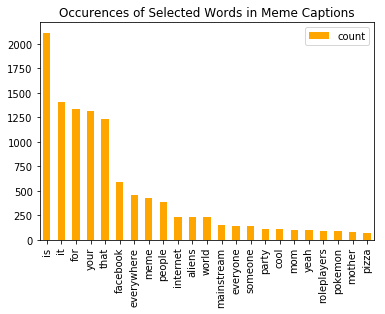

In [15]:
## Let's do another bar chart

df2 = pd.DataFrame({ 'word':highCountEnglishWords, 
                    'count':countsListInteresting
                  },
                  index=highCountEnglishWords).sort_values(by='count', ascending=False)

ax = df2.plot.bar(color='Orange').set_title('Occurences of Selected Words in Meme Captions')

## 5. Calculate the average number of words in each meme                

Earlier in this section, we created a list of the number of words in each meme 
(that is, the number of strings in each `Alternate Text` field delineated by a blank space character).

We will return to the `numWords` list. First, check to make sure that the list is still there:

In [16]:
print(type(numWords))
print(len(numWords))

<class 'dict'>
57652


That looks good. It is a dictionary and should have an item for each row, so if the dictionary length matches the value, this should be the right information. 

Now, let's grab the values and calculate an average

In [17]:
## Create a list for the values
wordLenList = list()
## The commented line below and lines lower down can be used to error check this code block
#dictCounter = 0

## Pull out the values from the numWords dictionary
for key, val in numWords.items():
#    dictCounter = dictCounter + 1
#    if dictCounter > 10:
#        break
#    print(key, val) 
    wordLenList.append(val)

## Calculate the average
averageNumWords = sum(wordLenList)/len(wordLenList)

print('The average number of words in each meme is',averageNumWords)

The average number of words in each meme is 8.60716020259488


So, in this list of 57,652 memes, **the average number of words in a meme is 8.6**.

**NB:** It may be important to remember that this program looks at the strings of texts and identifies "words" based on characters and intervening spaces. Therfore, many of the "words" may be non-English characters, individual characters, strings of numbers, or even emoji. A more accurate description might be to say that memes contain an average of 8.6 character strings, but for the most part these are words. 

## 6. Retrieve and display meme images

This is more challenging than initially suspected since the archive URLs contain a date range rather than the specific capture date. But that brings an interesting possibility to count number of times crawled. Can we do both? 

To display images, the [LoC exploration demo for loc.gov](https://github.com/LibraryOfCongress/data-exploration/blob/master/LOC.gov%20JSON%20API.ipynb) uses `Image` from `IPython.display` library. Others might use PILlow. 


In [18]:
from IPython.display import Image, display

display(Image(url='http://webarchive.loc.gov/all/20160206075330/http://cdn.meme.am/instances/250x250/10698210.jpg', format='jpg'))

We can loop through multiple images, too. This requires a slight manipulation of the URL in the field. The URL in the data set will take you to the LC Wayback page that allows you to see all of the occurences of the meme that have been gathered for the archive. By substituting the datestring in that URL with a 0, however, you can retrieve the most recent instance of the desired resource. 

Thus, using the URL above - http://webarchive.loc.gov/all/20160206075330/http://cdn.meme.am/instances/250x250/10698210.jpg - substitute `20160206075330` with `0`. In the the following example, that technique allows us to view five samples of the `Joseph Ducreux` meme:

In [19]:
## try to get five from a given meme type e.g., 'Joseph Ducreux'
q = 'Joseph Ducreux'
baseURL = 'http://webarchive.loc.gov/all/0/http:'
print(q,typesDict[q])

rowCounter = 0
qCounter = 0
for record in memeData: 
    rowCounter = rowCounter + 1
    if record['Base Meme Name'] == q:
        qCounter += 1
        if qCounter > 5:
            break
        URL = record['Archived URL']
        memeURL = record['Archived URL'].split('http:')[2]
        print(qCounter, rowCounter, memeURL)
        request = baseURL+memeURL
        print(record['Alternate Text'])
        display(Image(url=request))


Joseph Ducreux 414
1 17 //cdn.meme.am/instances/250x250/10178888.jpg
ha llegado la hora de la boludez!


2 47 //cdn.meme.am/instances/250x250/10179277.jpg
Juan y te chupo el orto fueron a robar un auto, a juan lo mataron quien kedo? te chupo el orto arre malisimo


3 56 //cdn.meme.am/instances/250x250/10179414.jpg
хапачку?


4 71 //cdn.meme.am/instances/250x250/10179566.jpg
Все в качалочку! БЛЕАТЬ!!!!!!


5 72 //cdn.meme.am/instances/250x250/10179569.jpg
Все в качалочку! БЛЕАТЬ!!!!!!


Have fun exploring these memes in more detail! You can read more about how Library of Congress staff analyzed this data set in this post on The Signal blog: http://blogs.loc.gov/thesignal/2018/10/data-mining-memes-in-the-digital-culture-web-archive/. 